In [2]:
import chainladder as cl
from bayesianchainladder import BayesianChainLadderGLM
import arviz as az

# Load a sample triangle
clrd = cl.load_sample("clrd")
triangle = clrd.loc[("New Jersey Manufacturers Grp", "wkcomp"), "CumPaidLoss"]
premium_triangle = clrd.loc[("New Jersey Manufacturers Grp", "wkcomp"), "EarnedPremNet"].latest_diagonal

triangle
premium_triangle

,1997
1988,"195,712"
1989,"212,194"
1990,"219,796"
1991,"249,595"
1992,"268,293"
1993,"316,726"
1994,"344,287"
1995,"356,880"
1996,"313,412"
1997,"261,261"


In [2]:
# Fit the Bayesian chain ladder model
model = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model.fit(triangle)

# Get reserve summary
print(model.summary())

# Access posterior samples
reserve_samples = model.sample_reserves(n_samples=1000)

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


          Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663471e+05    278.642829  1.663320e+05    3444.139628   
1990      176346.0  1.845191e+05    452.721389  1.844981e+05    8173.091207   
1991      187266.0  2.024049e+05    702.805203  2.023803e+05   15138.925097   
1992      189506.0  2.122671e+05    966.724883  2.122514e+05   22761.103511   
1993      175475.0  2.073778e+05   1321.434686  2.073708e+05   31902.815634   
1994      159972.0  2.054901e+05   1925.143045  2.054314e+05   45518.051808   
1995      122811.0  1.832109e+05   2879.621895  1.831394e+05   60399.851250   
1996       92242.0  1.733879e+05   4534.779558  1.732487e+05   81145.945467   
1997       43962.0  1.504717e+05   8088.878979  1.501745e+05  106509.650046   
Total    1310483.0  1.685477e+06  11568.727089  1.685338e+06  374993.573649   

                                    
              

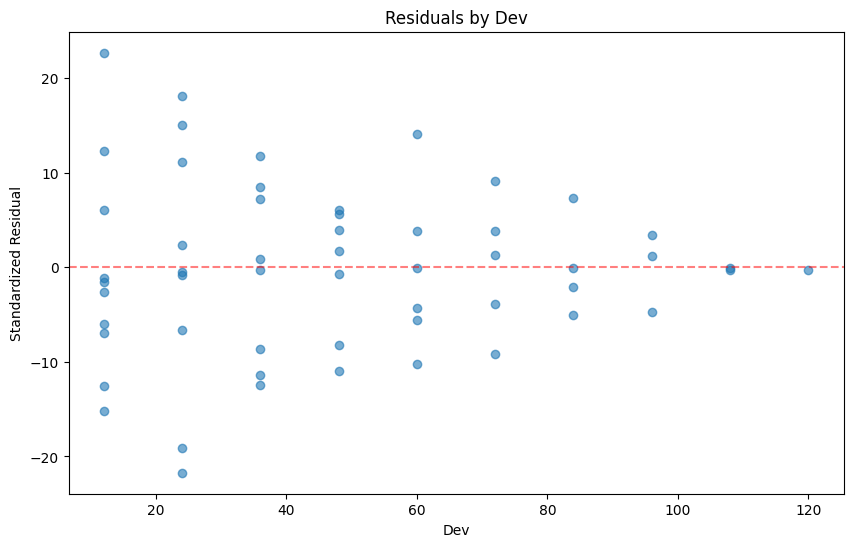

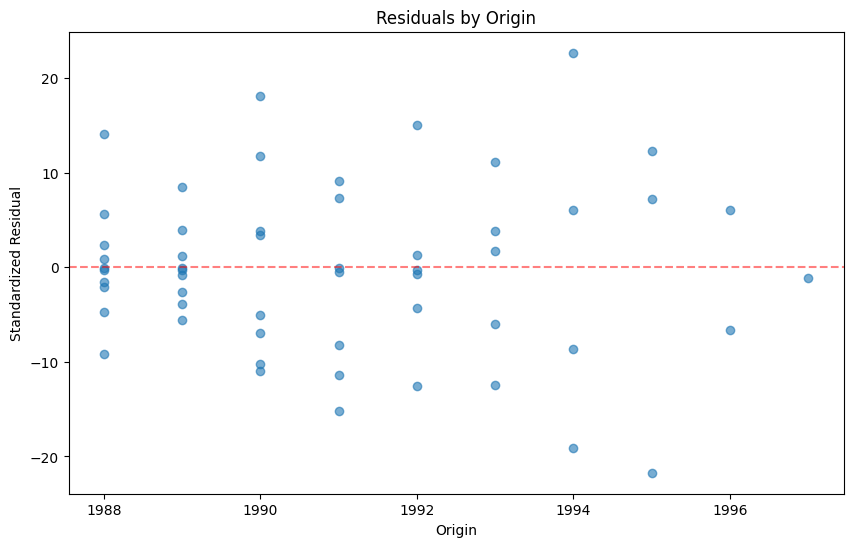

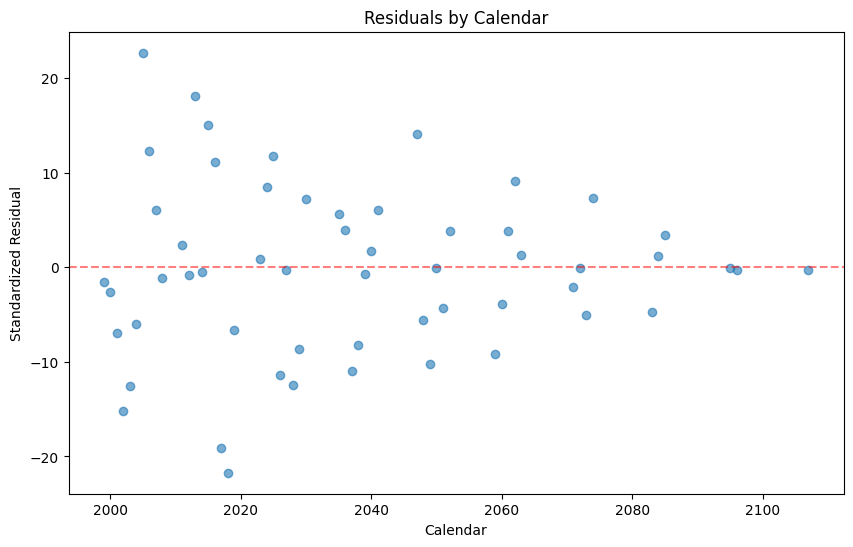

In [3]:
from bayesianchainladder import (
    plot_trace,
    plot_ppc,
    plot_reserve_distribution,
    plot_residuals,
    plot_heatmap_residuals,
    plot_development_pattern
)

fig, ax = plot_residuals(model, by="dev")
fig, ax = plot_residuals(model, by="origin")
fig, ax = plot_residuals(model, by="calendar")

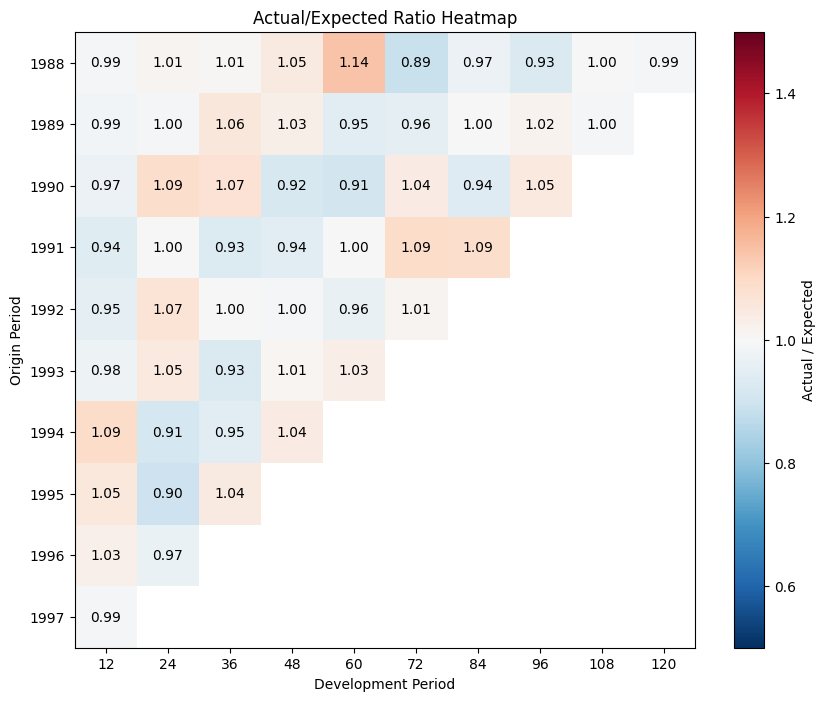

In [4]:
fig, ax = plot_heatmap_residuals(model)

In [5]:
model.ibnr_

,mean,std,median,5%,25%,75%,95%
origin,,,,,,,
1989,3444.139628,278.642829,3429.036952,3015.833142,3251.450068,3624.702355,3915.963260
1990,8173.091207,452.721389,8152.089649,7464.220880,7862.988041,8461.584033,8942.721678
1991,15138.925097,702.805203,15114.292822,14002.660353,14660.923377,15595.128698,16321.427290
1992,22761.103511,966.724883,22745.356368,21214.562886,22113.111778,23388.729632,24405.225839
1993,31902.815634,1321.434686,31895.807962,29797.621367,30980.173692,32765.823711,34098.102958
1994,45518.051808,1925.143045,45459.413696,42453.519927,44222.680325,46787.540498,48791.208976
1995,60399.851250,2879.621895,60328.438351,55777.875590,58446.519362,62264.829946,65309.931061
1996,81145.945467,4534.779558,81006.699514,74026.773732,78035.436917,84053.875064,88869.452676
1997,106509.650046,8088.878979,106212.533391,93901.088940,100931.312529,111643.988358,120556.024654


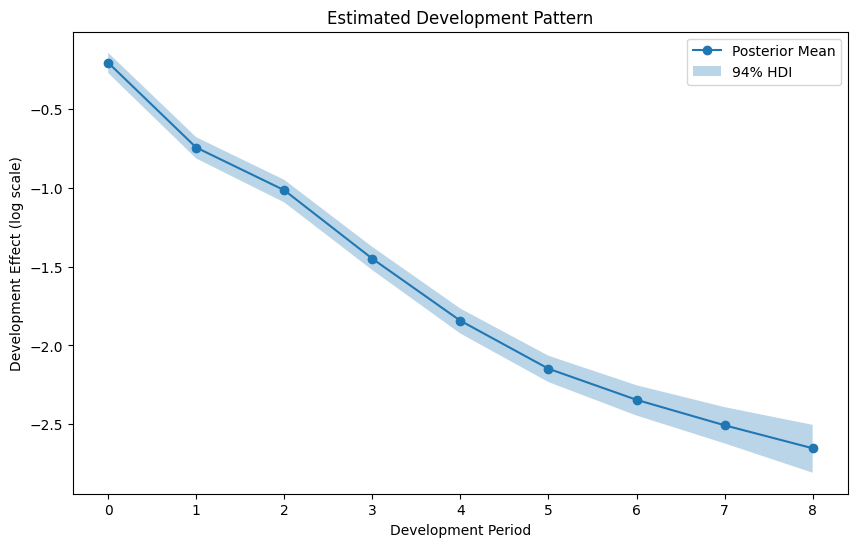

In [6]:
fig, ax = plot_development_pattern(model)

In [7]:
from bayesianchainladder import extract_parameter_summary

extract_parameter_summary(model.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.648,0.035,10.581,10.716,0.001,0.001,2262.0,3012.0,1.0
C(origin)[1989],0.145,0.034,0.080,0.207,0.001,0.000,3594.0,5137.0,1.0
C(origin)[1990],0.242,0.036,0.175,0.309,0.001,0.000,3448.0,5391.0,1.0
C(origin)[1991],0.369,0.038,0.298,0.440,0.001,0.000,3549.0,5026.0,1.0
C(origin)[1992],0.392,0.040,0.318,0.467,0.001,0.000,3791.0,5241.0,1.0
C(origin)[1993],0.369,0.042,0.292,0.447,0.001,0.000,3900.0,5435.0,1.0
C(origin)[1994],0.354,0.046,0.267,0.440,0.001,0.001,3890.0,5279.0,1.0
C(origin)[1995],0.246,0.051,0.149,0.340,0.001,0.001,4064.0,4738.0,1.0
C(origin)[1996],0.187,0.059,0.072,0.294,0.001,0.001,4744.0,5296.0,1.0
C(origin)[1997],0.045,0.079,-0.108,0.188,0.001,0.001,5216.0,5503.0,1.0


In [8]:
# Fit the Bayesian chain ladder model
model_spline = BayesianChainLadderGLM(
    formula="incremental ~ 1 + C(origin) + bs(dev, df=5)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_spline.fit(triangle)

# Get reserve summary
model_spline.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, C(origin), bs(dev, df=5)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.665770e+05    322.749854  1.665616e+05    3674.006528   
1990      176346.0  1.845546e+05    526.310573  1.845309e+05    8208.571489   
1991      187266.0  2.021568e+05    773.764563  2.021417e+05   14890.799669   
1992      189506.0  2.122240e+05   1087.926633  2.122085e+05   22717.982019   
1993      175475.0  2.080743e+05   1476.468985  2.080147e+05   32599.322840   
1994      159972.0  2.064138e+05   2264.509972  2.063331e+05   46441.753297   
1995      122811.0  1.814392e+05   3214.602893  1.812859e+05   58628.238798   
1996       92242.0  1.745039e+05   5426.478430  1.742823e+05   82261.927703   
1997       43962.0  1.507278e+05   9647.887081  1.501970e+05  106765.751810   
Total    1310483.0  1.686671e+06  13795.747856  1.686059e+06  376188.354153   

                                    
                std         median  
1989     322.749854    3658.633821  
1990     526.310573    8184.904401  
1991     773.764563   14875.655763  
1992    1087.926633   22702.492030  
1993    1476.468985   32539.654413  
1994    2264.509972   46361.077596  
1995    3214.602893   58474.919560  
1996    5426.478430   82040.310747  
1997    9647.887081  106235.032491  
Total  13795.747856  375575.826745

In [9]:
# Fit the Bayesian chain ladder model
model_quad = BayesianChainLadderGLM(
    formula="incremental ~ 1 + origin_idx + {origin_idx**2} + C(dev)",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_quad.fit(triangle)

# Get reserve summary
model_quad.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, origin_idx, I(origin_idx ** 2), C(dev)]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


Ultimate                                                    IBNR  \
      paid_to_date          mean          std        median           mean   
1989      162903.0  1.658748e+05   211.553572  1.658664e+05    2971.830769   
1990      176346.0  1.837916e+05   321.879937  1.837869e+05    7445.618950   
1991      187266.0  2.008269e+05   454.559807  2.008129e+05   13560.905377   
1992      189506.0  2.110942e+05   620.016446  2.110852e+05   21588.220770   
1993      175475.0  2.077523e+05   812.931587  2.077235e+05   32277.301970   
1994      159972.0  2.068778e+05  1075.452926  2.068599e+05   46905.811266   
1995      122811.0  1.898127e+05  1461.943363  1.897697e+05   67001.730478   
1996       92242.0  1.809635e+05  2163.568821  1.809340e+05   88721.505145   
1997       43962.0  1.641522e+05  3811.221469  1.641675e+05  120190.248378   
Total    1310483.0  1.711146e+06  8547.838676  1.711099e+06  400663.173103   

                                   
               std         median  
1989    211.553572    2963.354266  
1990    321.879937    7440.884918  
1991    454.559807   13546.892737  
1992    620.016446   21579.204690  
1993    812.931587   32248.503531  
1994   1075.452926   46887.920612  
1995   1461.943363   66958.685208  
1996   2163.568821   88692.001277  
1997   3811.221469  120205.541853  
Total  8547.838676  400616.089862

In [10]:
extract_parameter_summary(model_quad.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.456,0.039,10.386,10.531,0.001,0.000,3462.0,4803.0,1.0
origin_idx,0.208,0.015,0.179,0.237,0.000,0.000,3719.0,4373.0,1.0
I(origin_idx ** 2),-0.019,0.002,-0.021,-0.016,0.000,0.000,3564.0,4582.0,1.0
C(dev)[24],-0.208,0.032,-0.269,-0.149,0.001,0.000,3386.0,4401.0,1.0
C(dev)[36],-0.750,0.033,-0.811,-0.686,0.001,0.000,3313.0,4163.0,1.0
C(dev)[48],-1.016,0.035,-1.084,-0.952,0.001,0.000,3404.0,4520.0,1.0
C(dev)[60],-1.450,0.038,-1.519,-1.376,0.001,0.000,3530.0,4488.0,1.0
C(dev)[72],-1.840,0.040,-1.914,-1.766,0.001,0.000,3655.0,5059.0,1.0
C(dev)[84],-2.146,0.043,-2.228,-2.068,0.001,0.000,3950.0,4568.0,1.0
C(dev)[96],-2.355,0.048,-2.442,-2.263,0.001,0.001,4408.0,5414.0,1.0


In [11]:
import numpy as np

# Fit the Bayesian chain ladder model
model_quad_dev = BayesianChainLadderGLM(
    formula="incremental ~ 1 + origin_idx + {origin_idx**2} + I(dev_idx - 1) + {np.maximum(0, dev_idx - 7.5)} + {np.where(dev_idx == 2, 1, 0)}",
    family="negativebinomial",
    draws=2000,
    tune=1000,
)
model_quad_dev.fit(triangle)

# Get reserve summary
model_quad_dev.summary()

Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, Intercept, origin_idx, I(origin_idx ** 2), I(dev_idx - 1), I(np.maximum(0, dev_idx - 7.5)), I(np.where(dev_idx == 2, 1, 0))]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


Ultimate                                                     IBNR  \
      paid_to_date          mean           std        median           mean   
1989      162903.0  1.663208e+05    113.960919  1.663171e+05    3417.844066   
1990      176346.0  1.848049e+05    194.204537  1.847986e+05    8458.882840   
1991      187266.0  2.031334e+05    311.642572  2.031274e+05   15867.390983   
1992      189506.0  2.165167e+05    534.016224  2.165136e+05   27010.728804   
1993      175475.0  2.182923e+05    844.293322  2.182761e+05   42817.345008   
1994      159972.0  2.240175e+05   1214.047351  2.240027e+05   64045.477488   
1995      122811.0  2.138890e+05   1710.900579  2.138691e+05   91078.016390   
1996       92242.0  2.223319e+05   2912.390874  2.222898e+05  130089.854883   
1997       43962.0  2.106625e+05   5029.323328  2.105117e+05  166700.503007   
Total    1310483.0  1.859969e+06  10606.246807  1.859821e+06  549486.043467   

                                    
                std         median  
1989     113.960919    3414.070851  
1990     194.204537    8452.600605  
1991     311.642572   15861.377786  
1992     534.016224   27007.553604  
1993     844.293322   42801.076810  
1994    1214.047351   64030.670609  
1995    1710.900579   91058.093610  
1996    2912.390874  130047.782943  
1997    5029.323328  166549.664579  
Total  10606.246807  549338.404014

In [12]:
extract_parameter_summary(model_quad_dev.idata, var_names=["Intercept", "origin", "dev"], filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,10.455,0.039,10.376,10.524,0.001,0.0,4981.0,5100.0,1.0
origin_idx,0.207,0.016,0.178,0.239,0.000,0.0,3909.0,4502.0,1.0
I(origin_idx ** 2),-0.019,0.002,-0.022,-0.015,0.000,0.0,3906.0,4504.0,1.0
I(dev_idx - 1),-0.358,0.006,-0.369,-0.347,0.000,0.0,4925.0,5138.0,1.0
"I(np.maximum(0, dev_idx - 7.5))",0.239,0.029,0.183,0.292,0.000,0.0,5376.0,5522.0,1.0
"I(np.where(dev_idx == 2, 1, 0))",0.152,0.028,0.098,0.203,0.000,0.0,5944.0,5461.0,1.0


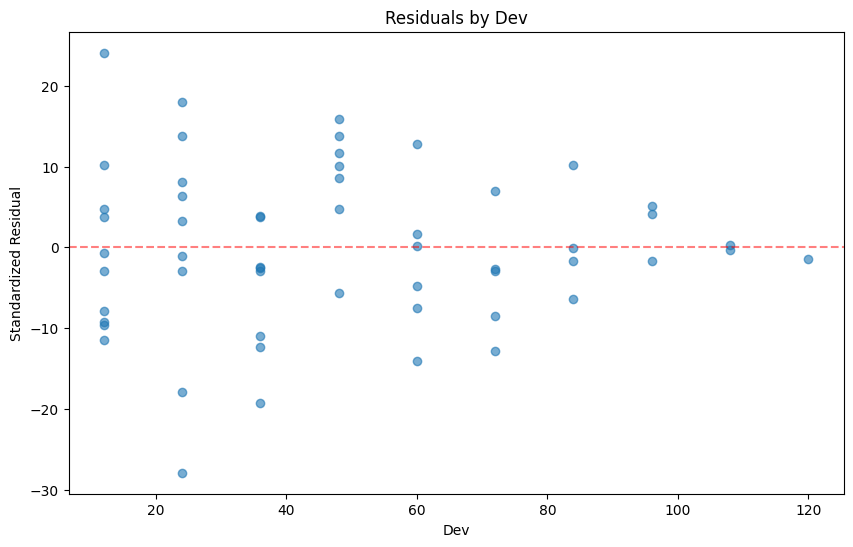

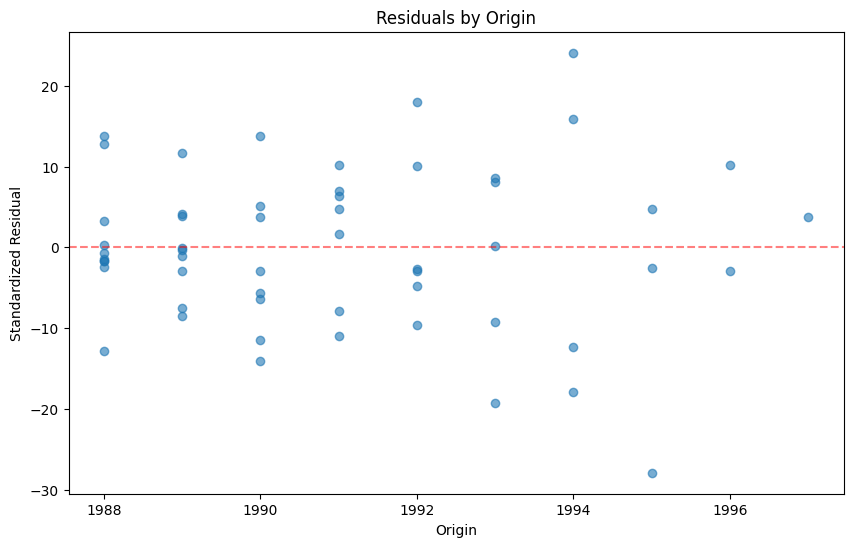

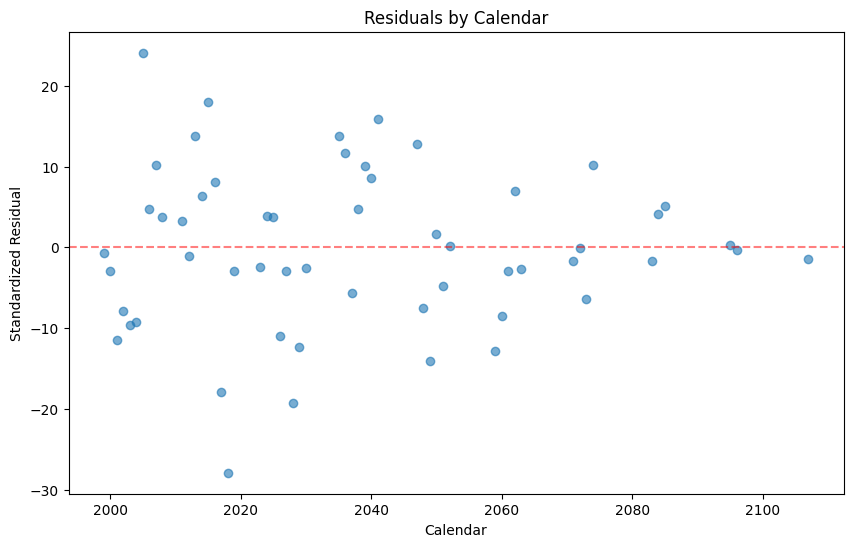

In [13]:
fig, ax = plot_residuals(model_quad_dev, by="dev")
fig, ax = plot_residuals(model_quad_dev, by="origin")
fig, ax = plot_residuals(model_quad_dev, by="calendar")

In [14]:
import arviz as az

az.compare({"Categorical Dev": model.idata, "Spline Dev": model_spline.idata})

/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-r

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Categorical Dev,0,-485.262516,16.934840,0.000000,0.964492,7.371207,0.000000,True,log
Spline Dev,1,-491.291827,14.210827,6.029312,0.035508,7.493243,3.624445,True,log


In [1]:
from bayesianchainladder import BayesianCSR
import chainladder as cl

# Load a sample triangle
clrd = cl.load_sample("clrd")
triangle_csr = clrd.loc[("Celina Mut Grp", "comauto"), "CumPaidLoss"]
premium_triangle_csr = clrd.loc[("Celina Mut Grp", "comauto"), "EarnedPremNet"].latest_diagonal

# Fit CSR model
model_csr = BayesianCSR(draws=2000,tune=1000)
model_csr.fit(triangle_csr, premium_triangle=premium_triangle_csr)

# Get reserve summary
model_csr.summary()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [r_alpha, r_beta, logelr, gamma, a_ig]


/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages
/rich/live.py:256: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
There were 108 divergences after tuning. Increase `target_accept` or reparameterize.


Ultimate                                                   IBNR  \
      paid_to_date          mean           std        median         mean   
1988        3912.0   3912.000000  9.094947e-13   3912.000000     0.000000   
1989        2531.0   2561.567550  1.059284e+02   2551.645574    30.567550   
1990        4155.0   4137.295868  1.762391e+02   4136.928258   -17.704132   
1991        4332.0   4288.901307  2.035800e+02   4282.983058   -43.098693   
1992        3491.0   3515.361420  1.840734e+02   3511.550499    24.361420   
1993        3034.0   3324.896288  2.241189e+02   3307.091674   290.896288   
1994        4714.0   4973.453269  4.176996e+02   4959.375250   259.453269   
1995        2607.0   3324.317044  4.114513e+02   3291.346069   717.317044   
1996        2412.0   3765.637200  7.455013e+02   3673.276178  1353.637200   
1997        1413.0   3792.685388  1.393229e+03   3576.452464  2379.685388   
Total      32601.0  37596.115334  2.319820e+03  37338.921224  4995.115334   

                                 
               std       median  
1988      0.000000     0.000000  
1989    105.928360    20.645574  
1990    176.239123   -18.071742  
1991    203.580000   -49.016942  
1992    184.073405    20.550499  
1993    224.118923   273.091674  
1994    417.699579   245.375250  
1995    411.451299   684.346069  
1996    745.501307  1261.276178  
1997   1393.229442  2163.452464  
Total  2319.820193  4737.921224

In [18]:
model_csr.get_parameter_summary(var_names=["alpha", "beta","logelr","gamma","sigma"], filter_vars="regex")

/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/atroyer/Library/Caches/pypoetry/virtualenvs/bayesianchainladder-damyFrx8-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value enc

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
r_alpha[1989],-0.255,0.026,-0.304,-0.204,0.000,0.000,3526.0,3301.0,1.0
r_alpha[1990],0.119,0.029,0.060,0.172,0.000,0.001,4397.0,4016.0,1.0
r_alpha[1991],0.208,0.036,0.139,0.276,0.001,0.001,4046.0,3815.0,1.0
r_alpha[1992],0.000,0.043,-0.084,0.082,0.001,0.001,4595.0,4077.0,1.0
r_alpha[1993],-0.060,0.060,-0.166,0.060,0.001,0.001,3943.0,4250.0,1.0
r_alpha[1994],0.387,0.079,0.247,0.550,0.001,0.001,3747.0,3805.0,1.0
r_alpha[1995],-0.113,0.117,-0.337,0.109,0.002,0.002,4442.0,4388.0,1.0
r_alpha[1996],0.045,0.195,-0.294,0.441,0.004,0.003,2932.0,3705.0,1.0
r_alpha[1997],0.062,0.348,-0.589,0.739,0.006,0.005,4064.0,3984.0,1.0
r_beta[12],-1.381,0.164,-1.687,-1.070,0.003,0.002,2988.0,3841.0,1.0


(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'gamma'}>)<Axes: xlabel='incremental'>

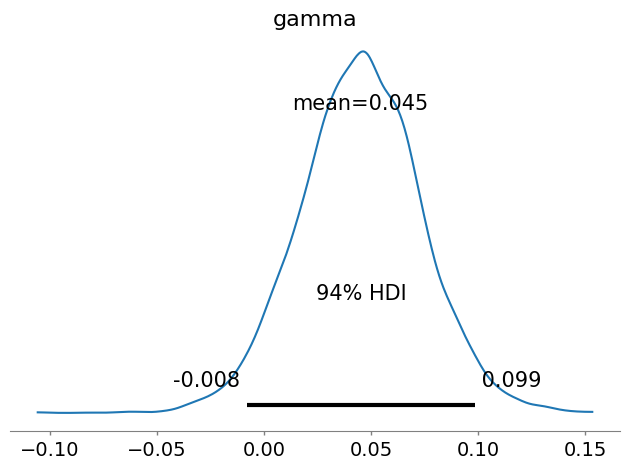

In [38]:
from bayesianchainladder import plot_posterior

plot_posterior(model_csr, var_names=["gamma"])